In [15]:
from collections.abc import Sequence
import json
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

EPSILON = 1e-3

plt.style.use("seaborn-v0_8-deep")
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Liberation Serif"]
plt.rcParams["font.size"] = 18

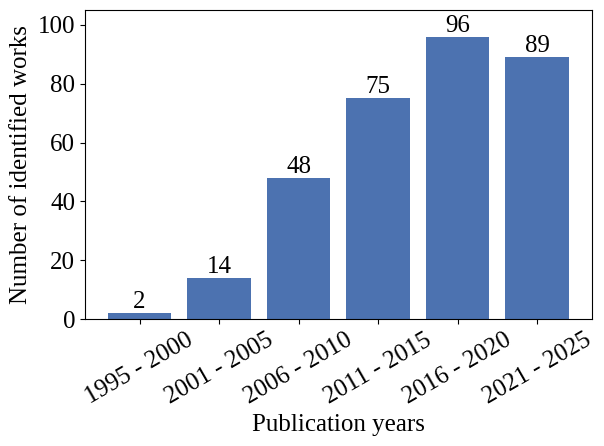

In [16]:
plt.clf()
plt.xlabel("Publication years")
plt.ylabel("Number of identified works")
plt.ylim(0, 105)
plt.xticks(rotation=30)
b = plt.bar(
    x=["1995 - 2000", "2001 - 2005", "2006 - 2010", "2011 - 2015", "2016 - 2020", "2021 - 2025"],
    height=[2, 14, 48, 75, 96, 89]
)
plt.bar_label(b)
plt.tight_layout()
plt.savefig("./out/sr-per-year.pdf", metadata={"CreationDate": None, "ModDate": None})

In [17]:
def rq_boxplot(
    *,
    input: str,
    output: str | None = None,
    ais: Sequence[int],
    xlabel: str = "Approaches",
    ylabel: str = "[TODO] Metric",
    tlabel: Sequence[str],
    baseline: int = 0,
    negative: bool = False,
) -> None:
    if output is None:
        output = input
    assert len(ais) == len(tlabel)

    BC = mcolors.to_rgba("C1", alpha=0.25)
    PC = mcolors.to_rgba("C4", alpha=0.25)

    with Path.open(f"../tcp-framework/out/{input}.json", "r") as f:
        data = json.load(f)
    values = [[sum(ds[ai]) / len(ds[ai]) for ds in data.values()] for ai in ais]

    plt.clf()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    bp = plt.boxplot(values, tick_labels=tlabel, patch_artist=True, showmeans=True, medianprops={"color": "C2", "linewidth": 2})
    for bi, box in enumerate(bp["boxes"]):
        box.set_facecolor(BC if bi < baseline else PC)
    if negative:
        plt.axhline(color="black", linestyle="dotted")
    plt.tight_layout()
    plt.savefig(f"./out/{output}.pdf", metadata={"CreationDate": None, "ModDate": None})


def rq_table(
    *,
    input: str,
    ais: Sequence[int],
    xlabel: str = "Approaches",
    tlabel: Sequence[str],
    negative: bool = False,
    subsequent: bool = False,
) -> None:
    assert len(ais) == len(tlabel)

    AM = " & "
    def sp(count: int = 4) -> str:
        return " " * count
    def bf(content: str) -> str:
        return r"\textbf{" + content + r"}"
    def tt(content: str) -> str:
        return r"\texttt{" + content + r"}"
    def fmt(number: float) -> str:
        out = f"{number:.3f}".replace("0.", ".")
        if negative and number > 0:
            out = "+" + out
        return out
    def ds(content: str) -> str:
        return content if not subsequent else ""
    def cells(values: Sequence[float]) -> str:
        return AM.join((fmt(v) if v + EPSILON < max(values) else bf(fmt(v))) for v in values)

    with Path.open(f"../tcp-framework/out/{input}.json", "r") as f:
        data = json.load(f)
    rows = [[sum(ap) / len(ap) for ap in ds] for ds in data.values()]

    print(r"\begin{tabular}{" + ds("l ") + " ".join(["r"] * len(ais)) + r"}")
    print(sp() + r"\toprule")
    print(sp() + ds(r"\multirow{2}{*}{" + bf("Subject program") + r"} & ") + r"\multicolumn{" + str(len(ais)) + r"}{c}{" + bf(xlabel) + r"} \\")
    print(sp() + ds(AM) + AM.join([bf(v) for v in tlabel]) + r" \\ \midrule")
    for d, row in zip(data.keys(), rows, strict=True):
        values = [v for i, v in enumerate(row) if i in ais]
        print(sp() + ds(tt(d) + AM) + cells(values) + r" \\")
    print(sp() + r"\midrule")
    means = [sum(row[i] for row in rows) / len(rows) for i in ais]
    print(sp() + ds(bf("Mean") + AM) + cells(means) + r"\\")
    medians = [sorted([row[i] for row in rows])[len(rows) // 2] for i in ais]
    print(sp() + ds(bf("Median") + AM) + cells(medians) + r"\\")
    print(sp() + r"\bottomrule")
    print(r"\end{tabular}")


def rq(
    *,
    input: str,
    output: str | None = None,
    ais: Sequence[int],
    xlabel: str = "Approaches",
    ylabel: str = "[TODO] Metric",
    tlabel: Sequence[str],
    baseline: int = 0,
    negative: bool = False,
    subsequent: bool = False,
) -> None:
    rq_boxplot(
        input=input,
        output=output,
        ais=ais,
        xlabel=xlabel,
        ylabel=ylabel,
        tlabel=tlabel,
        baseline=baseline,
        negative=negative,
    )
    rq_table(
        input=input,
        ais=ais,
        xlabel=xlabel,
        tlabel=tlabel,
        negative=negative,
        subsequent=subsequent,
    )

\begin{tabular}{l r r r}
    \toprule
    \multirow{2}{*}{\textbf{Subject program}} & \multicolumn{3}{c}{\textbf{RQ1.1: Normalization}} \\
     & \textbf{None} & \textbf{Formatting} & \textbf{Identifiers} \\ \midrule
    \texttt{LittleProxy} & .481 & .524 & \textbf{.556} \\
    \texttt{HikariCP} & .289 & .334 & \textbf{.384} \\
    \texttt{jade4j} & .452 & \textbf{.671} & .498 \\
    \texttt{wicket-bootstrap} & .725 & \textbf{.731} & .532 \\
    \texttt{titan} & .111 & .170 & \textbf{.328} \\
    \texttt{dynjs} & .481 & .415 & \textbf{.532} \\
    \texttt{jsprit} & .539 & \textbf{.556} & .533 \\
    \texttt{DSpace} & \textbf{.433} & .345 & .406 \\
    \texttt{optiq} & .444 & .419 & \textbf{.522} \\
    \texttt{cloudify} & .447 & \textbf{.453} & .413 \\
    \texttt{okhttp} & .315 & \textbf{.316} & .312 \\
    \midrule
    \textbf{Mean} & .429 & .449 & \textbf{.456}\\
    \textbf{Median} & .447 & .419 & \textbf{.498}\\
    \bottomrule
\end{tabular}


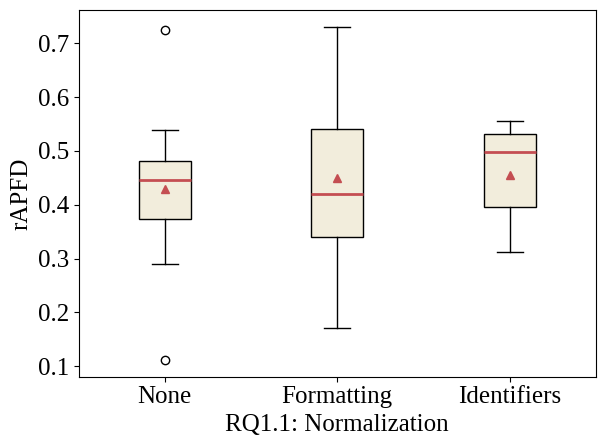

In [18]:
rq(
    input="rq11",
    ais=range(3),
    xlabel="RQ1.1: Normalization",
    ylabel="rAPFD",
    tlabel=["None", "Formatting", "Identifiers"]
)

\begin{tabular}{r r}
    \toprule
    \multicolumn{2}{c}{\textbf{RQ1.2: Distance}} \\
    \textbf{Manhattan} & \textbf{Euclidean} \\ \midrule
    \textbf{.567} & .556 \\
    .339 & \textbf{.384} \\
    .476 & \textbf{.498} \\
    .529 & \textbf{.532} \\
    \textbf{.339} & .328 \\
    \textbf{.534} & .532 \\
    \textbf{.548} & .533 \\
    .302 & \textbf{.406} \\
    .492 & \textbf{.522} \\
    \textbf{.420} & .413 \\
    .295 & \textbf{.312} \\
    \midrule
    .440 & \textbf{.456}\\
    .476 & \textbf{.498}\\
    \bottomrule
\end{tabular}


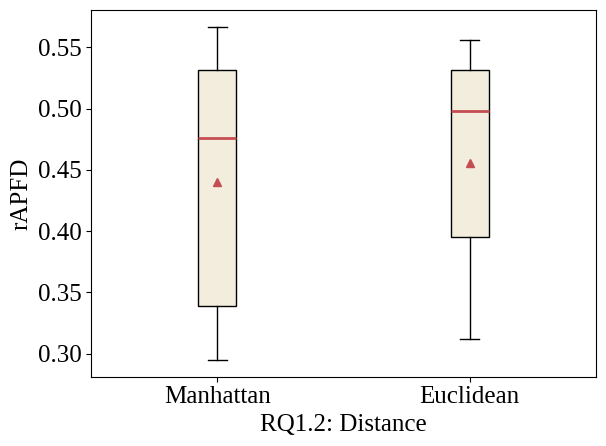

In [19]:
rq(
    input="rq12",
    ais=range(2),
    xlabel="RQ1.2: Distance",
    ylabel="rAPFD",
    tlabel=["Manhattan", "Euclidean"],
    subsequent=True
)

\begin{tabular}{r r r}
    \toprule
    \multicolumn{3}{c}{\textbf{RQ1.3: Aggregation}} \\
    \textbf{Min} & \textbf{Average} & \textbf{Max} \\ \midrule
    .556 & .500 & \textbf{.642} \\
    .384 & .376 & \textbf{.429} \\
    \textbf{.498} & .477 & .415 \\
    .532 & \textbf{.534} & .380 \\
    .328 & .390 & \textbf{.719} \\
    .532 & \textbf{.536} & .328 \\
    .533 & \textbf{.584} & .512 \\
    \textbf{.406} & .282 & .362 \\
    \textbf{.522} & .416 & .455 \\
    \textbf{.413} & .340 & .252 \\
    .312 & .437 & \textbf{.469} \\
    \midrule
    \textbf{.456} & .443 & .451\\
    \textbf{.498} & .437 & .429\\
    \bottomrule
\end{tabular}


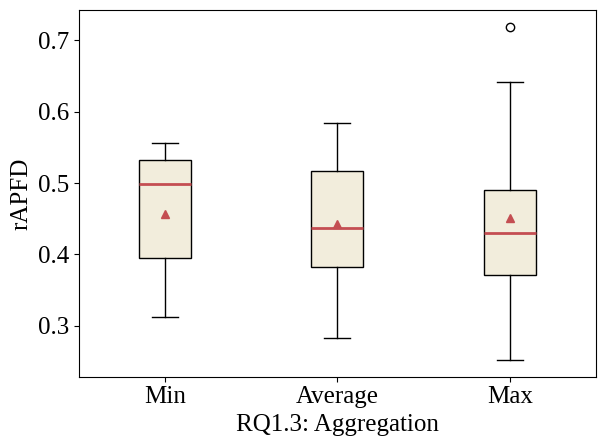

In [20]:
rq(
    input="rq13",
    ais=range(3),
    xlabel="RQ1.3: Aggregation",
    ylabel="rAPFD",
    tlabel=["Min", "Average", "Max"],
    subsequent=True
)

\begin{tabular}{l r r r r r r}
    \toprule
    \multirow{2}{*}{\textbf{Subject program}} & \multicolumn{6}{c}{\textbf{RQ2.1: Approaches}} \\
     & \textbf{FoldFails} & \textbf{Recent} & \textbf{ExeTime} & \textbf{Borda} & \textbf{Random} & \textbf{Schulze} \\ \midrule
    \texttt{LittleProxy} & \textbf{.697} & .375 & .501 & .639 & .584 & .628 \\
    \texttt{HikariCP} & .749 & .530 & .666 & \textbf{.846} & .719 & .831 \\
    \texttt{jade4j} & .661 & .805 & .657 & \textbf{.857} & .652 & .681 \\
    \texttt{wicket-bootstrap} & .748 & .727 & .495 & \textbf{.833} & .756 & \textbf{.833} \\
    \texttt{titan} & \textbf{.896} & .431 & .287 & .856 & .844 & .856 \\
    \texttt{dynjs} & .840 & .533 & .824 & \textbf{.888} & .857 & .885 \\
    \texttt{jsprit} & .872 & .623 & .601 & \textbf{.975} & .917 & \textbf{.975} \\
    \texttt{DSpace} & \textbf{.738} & .482 & .676 & .719 & .619 & .719 \\
    \texttt{optiq} & .870 & .216 & .692 & \textbf{.889} & .814 & \textbf{.889} \\
    \texttt{cloudify} 

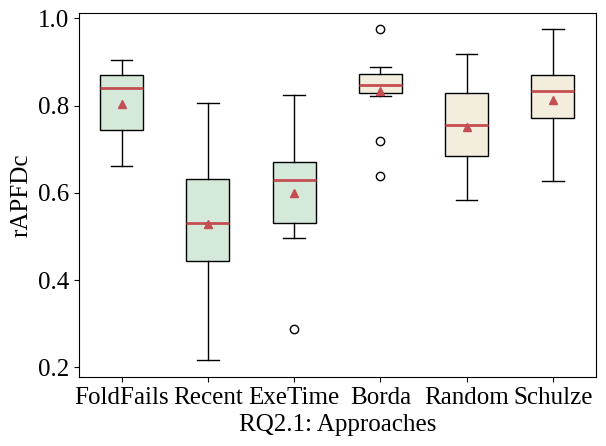

In [21]:
rq(
    input="rq21",
    ais=range(6),
    xlabel="RQ2.1: Approaches",
    ylabel="rAPFDc",
    tlabel=["FoldFails", "Recent", "ExeTime", "Borda", "Random", "Schulze"],
    baseline=3,
)

\begin{tabular}{r r r r}
    \toprule
    \multicolumn{4}{c}{\textbf{RQ2.2: Approaches}} \\
    \textbf{ExeTime} & \textbf{Recent} & \textbf{FailDensity} & \textbf{Interpolated} \\ \midrule
    .501 & .375 & .694 & \textbf{.707} \\
    .666 & .530 & \textbf{.775} & \textbf{.775} \\
    .657 & .805 & \textbf{.887} & \textbf{.887} \\
    .495 & .727 & .747 & \textbf{.785} \\
    .287 & .431 & .908 & \textbf{.930} \\
    .824 & .533 & \textbf{.846} & .831 \\
    .601 & .623 & .872 & \textbf{.896} \\
    .676 & .482 & .738 & \textbf{.793} \\
    .692 & .216 & .870 & \textbf{.914} \\
    .628 & .639 & .855 & \textbf{.868} \\
    .560 & .456 & .903 & \textbf{.908} \\
    \midrule
    .599 & .529 & .827 & \textbf{.845}\\
    .628 & .530 & .855 & \textbf{.868}\\
    \bottomrule
\end{tabular}


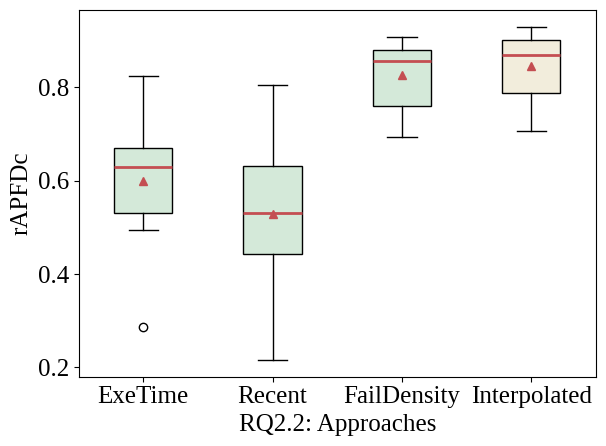

In [22]:
rq(
    input="rq22",
    ais=range(4),
    xlabel="RQ2.2: Approaches",
    ylabel="rAPFDc",
    tlabel=["ExeTime", "Recent", "FailDensity", "Interpolated"],
    baseline=3,
    subsequent=True,
)

\begin{tabular}{l r r r}
    \toprule
    \multirow{2}{*}{\textbf{Subject program}} & \multicolumn{3}{c}{\textbf{RQ2.3: ExeTime breaking}} \\
     & \textbf{TotalFails} & \textbf{ExeTime} & \textbf{Breaked} \\ \midrule
    \texttt{LittleProxy} & .678 & .501 & \textbf{.716} \\
    \texttt{HikariCP} & .583 & \textbf{.666} & .596 \\
    \texttt{jade4j} & .606 & \textbf{.657} & .617 \\
    \texttt{wicket-bootstrap} & .744 & .495 & \textbf{.898} \\
    \texttt{titan} & .888 & .287 & \textbf{.899} \\
    \texttt{dynjs} & .835 & .824 & \textbf{.947} \\
    \texttt{jsprit} & .819 & .601 & \textbf{.898} \\
    \texttt{DSpace} & .739 & .676 & \textbf{.822} \\
    \texttt{optiq} & .852 & .692 & \textbf{.943} \\
    \texttt{cloudify} & .767 & .628 & \textbf{.809} \\
    \texttt{okhttp} & .865 & .560 & \textbf{.884} \\
    \midrule
    \textbf{Mean} & .761 & .599 & \textbf{.821}\\
    \textbf{Median} & .767 & .628 & \textbf{.884}\\
    \bottomrule
\end{tabular}


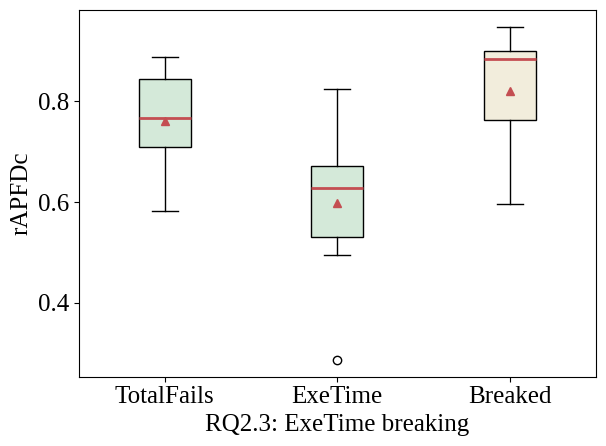

In [23]:
rq(
    input="rq23",
    output="rq23-exe",
    ais=[0, 1, 3],
    xlabel="RQ2.3: ExeTime breaking",
    ylabel="rAPFDc",
    tlabel=["TotalFails", "ExeTime", "Breaked"],
    baseline=2,
)

\begin{tabular}{r r r}
    \toprule
    \multicolumn{3}{c}{\textbf{RQ2.3: CodeDist breaking}} \\
    \textbf{TotalFails} & \textbf{CodeDist} & \textbf{Breaked} \\ \midrule
    .678 & .614 & \textbf{.679} \\
    \textbf{.583} & .450 & .579 \\
    .606 & .379 & \textbf{.615} \\
    .744 & .557 & \textbf{.811} \\
    .888 & .505 & \textbf{.915} \\
    .835 & .397 & \textbf{.920} \\
    .819 & .604 & \textbf{.847} \\
    .739 & .427 & \textbf{.818} \\
    .852 & .703 & \textbf{.915} \\
    .767 & .358 & \textbf{.804} \\
    .865 & .368 & \textbf{.878} \\
    \midrule
    .761 & .488 & \textbf{.798}\\
    .767 & .450 & \textbf{.818}\\
    \bottomrule
\end{tabular}


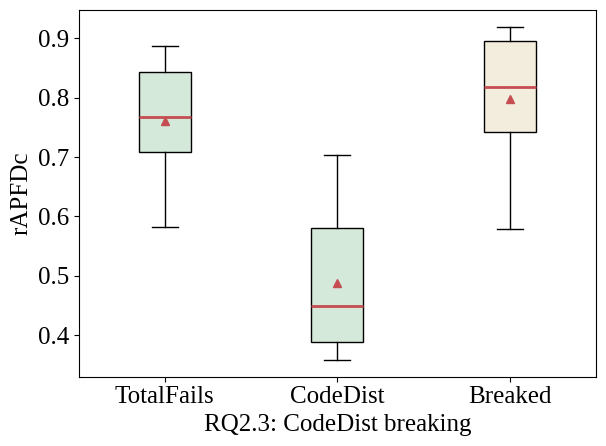

In [24]:
rq(
    input="rq23",
    output="rq23-code",
    ais=[0, 2, 4],
    ylabel="rAPFDc",
    xlabel="RQ2.3: CodeDist breaking",
    tlabel=["TotalFails", "CodeDist", "Breaked"],
    baseline=2,
    subsequent=True
)

\begin{tabular}{l r r r r r r r r}
    \toprule
    \multirow{2}{*}{\textbf{Subject program}} & \multicolumn{8}{c}{\textbf{RQ3: Baselines}} \\
     & \textbf{B1} & \textbf{B2} & \textbf{B3} & \textbf{B4} & \textbf{B5} & \textbf{B6} & \textbf{B7} & \textbf{B8} \\ \midrule
    \texttt{LittleProxy} & .453 & .424 & .558 & .470 & .659 & \textbf{.694} & .584 & .426 \\
    \texttt{HikariCP} & .570 & .462 & .446 & .527 & .744 & .775 & \textbf{.793} & .535 \\
    \texttt{jade4j} & .226 & .485 & .566 & .769 & .661 & \textbf{.887} & .570 & .842 \\
    \texttt{wicket-bootstrap} & .009 & .529 & .514 & .741 & \textbf{.892} & .747 & .855 & .783 \\
    \texttt{titan} & .492 & .488 & .520 & .524 & .916 & .908 & \textbf{.930} & .719 \\
    \texttt{dynjs} & .398 & .514 & .494 & .791 & .871 & .846 & \textbf{.951} & .948 \\
    \texttt{jsprit} & .433 & .373 & .573 & .758 & .913 & .872 & \textbf{.936} & .724 \\
    \texttt{DSpace} & .303 & .616 & .592 & .702 & .658 & .738 & .801 & \textbf{.851} \\
    \text

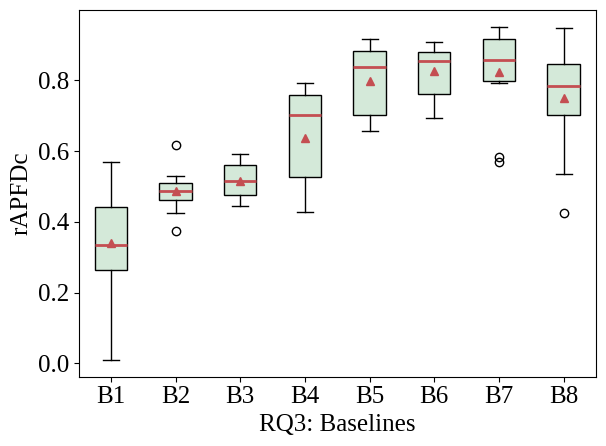

In [25]:
rq(
    input="rq3-base",
    ais=range(8),
    ylabel="rAPFDc",
    xlabel="RQ3: Baselines",
    tlabel=[
        "B1", "B2", "B3", "B4", "B5", "B6", "B7", "B8"
    ],
    baseline=8,
)

\begin{tabular}{r r r r r r}
    \toprule
    \multicolumn{6}{c}{\textbf{RQ3.1: Approaches}} \\
    \textbf{B3} & \textbf{B5} & \textbf{B7} & \textbf{P1} & \textbf{P2} & \textbf{P3} \\ \midrule
    .558 & .659 & .584 & .639 & .707 & \textbf{.716} \\
    .446 & .744 & .793 & \textbf{.846} & .775 & .596 \\
    .566 & .661 & .570 & .857 & \textbf{.887} & .617 \\
    .514 & .892 & .855 & .833 & .785 & \textbf{.898} \\
    .520 & .916 & \textbf{.930} & .856 & \textbf{.930} & .899 \\
    .494 & .871 & \textbf{.951} & .888 & .831 & .947 \\
    .573 & .913 & .936 & \textbf{.975} & .896 & .898 \\
    .592 & .658 & .801 & .719 & .793 & \textbf{.822} \\
    .457 & .836 & .858 & .889 & .914 & \textbf{.943} \\
    .443 & .849 & \textbf{.902} & .823 & .868 & .809 \\
    .512 & .771 & .869 & .834 & \textbf{.908} & .884 \\
    \midrule
    .516 & .797 & .823 & .833 & \textbf{.845} & .821\\
    .514 & .836 & .858 & .846 & .868 & \textbf{.884}\\
    \bottomrule
\end{tabular}


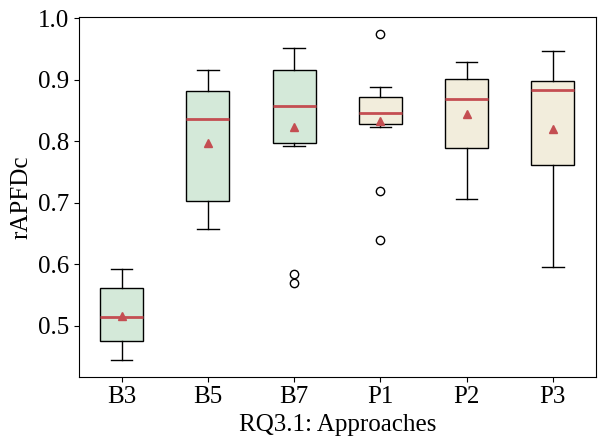

In [26]:
rq(
    input="rq3-rapfdc",
    ais=range(6),
    ylabel="rAPFDc",
    xlabel="RQ3.1: Approaches",
    tlabel=["B3", "B5", "B7", "P1", "P2", "P3"],
    baseline=3,
    subsequent=True,
)

\begin{tabular}{l r r r r r r}
    \toprule
    \multirow{2}{*}{\textbf{Subject program}} & \multicolumn{6}{c}{\textbf{RQ3.2: Approaches (NTR)}} \\
     & \textbf{B1} & \textbf{B2} & \textbf{B3} & \textbf{P1} & \textbf{P2} & \textbf{P3} \\ \midrule
    \texttt{LittleProxy} & .440 & .521 & .513 & .564 & \textbf{.617} & .570 \\
    \texttt{HikariCP} & .608 & .634 & .796 & \textbf{.835} & .635 & .590 \\
    \texttt{jade4j} & .807 & .750 & .863 & .900 & \textbf{.904} & .630 \\
    \texttt{wicket-bootstrap} & .472 & .807 & .768 & .747 & .746 & \textbf{.824} \\
    \texttt{titan} & .558 & .779 & \textbf{.825} & .703 & .816 & .757 \\
    \texttt{dynjs} & .590 & .928 & .961 & .945 & .870 & \textbf{.968} \\
    \texttt{jsprit} & .585 & .824 & .857 & \textbf{.899} & .783 & .785 \\
    \texttt{DSpace} & .553 & .556 & .631 & .544 & \textbf{.658} & .616 \\
    \texttt{optiq} & .474 & .817 & .693 & .781 & \textbf{.890} & .883 \\
    \texttt{cloudify} & .389 & .662 & \textbf{.690} & .583 & .667 & .52

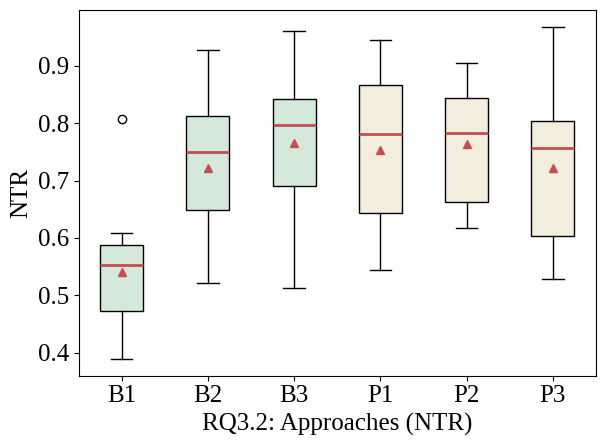

In [27]:
rq(
    input="rq3-ntr",
    ais=range(6),
    ylabel="NTR",
    xlabel="RQ3.2: Approaches (NTR)",
    tlabel=["B1", "B2", "B3", "P1", "P2", "P3"],
    baseline=3,
)

\begin{tabular}{l r r r r r r}
    \toprule
    \multirow{2}{*}{\textbf{Subject program}} & \multicolumn{6}{c}{\textbf{RQ3.2: Approaches (ATR)}} \\
     & \textbf{B1} & \textbf{B2} & \textbf{B3} & \textbf{P1} & \textbf{P2} & \textbf{P3} \\ \midrule
    \texttt{LittleProxy} & +.000 & +.009 & +.008 & +.014 & \textbf{+.020} & +.015 \\
    \texttt{HikariCP} & -.006 & -.004 & +.011 & \textbf{+.014} & -.004 & -.008 \\
    \texttt{jade4j} & +.019 & +.015 & +.024 & \textbf{+.027} & \textbf{+.027} & +.005 \\
    \texttt{wicket-bootstrap} & +.012 & \textbf{+.021} & +.020 & +.020 & +.020 & \textbf{+.022} \\
    \texttt{titan} & +.006 & +.022 & \textbf{+.025} & +.016 & \textbf{+.024} & +.020 \\
    \texttt{dynjs} & +.001 & \textbf{+.005} & \textbf{+.006} & \textbf{+.006} & +.005 & \textbf{+.006} \\
    \texttt{jsprit} & +.009 & +.021 & +.023 & \textbf{+.025} & +.019 & +.019 \\
    \texttt{DSpace} & +.003 & +.003 & \textbf{+.004} & +.003 & \textbf{+.004} & \textbf{+.004} \\
    \texttt{optiq} & +.0

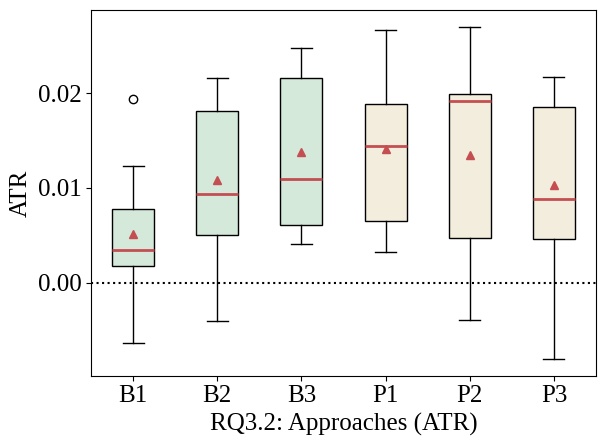

In [28]:
rq(
    input="rq3-atr",
    ais=range(6),
    ylabel="ATR",
    xlabel="RQ3.2: Approaches (ATR)",
    tlabel=["B1", "B2", "B3", "P1", "P2", "P3"],
    baseline=3,
    negative=True,
)
# """
#     8s | 515s | 463s | 780s | 1110s | 817s
#     -278s | -177s | 476s | 632s | -172s | -352s
#     48s | 37s | 58s | 66s | 67s | 13s
#     79s | 136s | 130s | 126s | 126s | 139s
#     10300s | 35817s | 41083s | 27061s | 39995s | 33206s
#     20s | 78s | 83s | 81s | 68s | 84s
#     223s | 511s | 550s | 601s | 461s | 463s
#     779s | 785s | 968s | 758s | 1035s | 931s
#     9444s | 21981s | 17424s | 20648s | 24643s | 24393s
#     973s | 2074s | 2184s | 1756s | 2093s | 1538s
#     2882s | 7380s | 11032s | 10319s | 11003s | 10138s
# """